In [1]:
#       keep the memory allocated for the machine to 2GB!

import numpy as np
from sklearn.neighbors import KNeighborsRegressor

def zero_one_error_labels(y, y_hat):
    return np.sum(y_hat == y)

def mse (y,y_hat):
    return np.mean(np.power(y-y_hat,2))


In [2]:
# load data
print("Loading training data ...")
data_train = np.genfromtxt("../../data/neighbors/train.csv", comments="#", delimiter=",")
Xtrain, ytrain = data_train[:,:-1], data_train[:,-1]
print("Loaded training data: n=%i, d=%i" % (Xtrain.shape[0], Xtrain.shape[1]))

# testing phase (apply model to a big test set!)
print("Loading testing data ...")
data_test = np.genfromtxt("../../data/neighbors/test.csv", comments="#", delimiter=",")
Xtest, ytest = data_test[:,:-1], data_test[:,-1]
print("Loaded testing data: n=%i, d=%i" % (Xtest.shape[0], Xtest.shape[1]))


Loading training data ...
Loaded training data: n=100000, d=15
Loading testing data ...
Loaded testing data: n=1000000, d=15


In [3]:
print("Loading validation data ...")
data_validation = np.genfromtxt("../../data/neighbors/validation.csv", comments="#", delimiter=",")
Xvd, yvd = data_validation[:,:-1], data_validation[:,-1]
print("Loaded validation data: n=%i, d=%i" % (Xvd.shape[0], Xvd.shape[1]))


Loading validation data ...
Loaded validation data: n=100000, d=15


In [4]:
# training phase
print("Fitting model ...")
# nearest neighbor regression model (DO NOT CHANGE PARAMETERS!)
model = KNeighborsRegressor(n_neighbors=10, algorithm="kd_tree")
%time model.fit(Xtrain, ytrain)
print("Model fitted!")

print("Applying model ...")
% time preds = model.predict(Xtest)

# output (here, 'preds' must be a list containing all predictions)
print("Predictions computed for %i patterns ...!" % len(preds))
print("Mean of predictions: %f" % np.mean(np.array(preds)))

Fitting model ...
CPU times: user 368 ms, sys: 28 ms, total: 396 ms
Wall time: 693 ms
Model fitted!
Applying model ...
CPU times: user 5min 40s, sys: 836 ms, total: 5min 41s
Wall time: 5min 41s
Predictions computed for 1000000 patterns ...!
Mean of predictions: 0.351215


In [5]:
print ("Mean Squared Error on test: %f" % mse(ytest,preds))

Mean Squared Error on test: 0.225451


In [6]:
# select only first 5 columns from the train data
Xtrain_5feat = data_train[:,0:5]

print("Loaded training data: n=%i, d=%i" % (Xtrain_5feat.shape[0], Xtrain_5feat.shape[1]))

# training phase
print("Fitting model ...")
%time model.fit(Xtrain_5feat, ytrain)
print("Model fitted!")

# testing phase (apply model to a big test set!)
Xtest_5feat = data_test[:,0:5]

print("Applying model ...")
%time preds_5feat = model.predict(Xtest_5feat)

# output (here, 'preds' must be a list containing all predictions)
print("Predictions computed for %i patterns ...!" % len(preds))
print("Mean of predictions: %f" % np.mean(np.array(preds)))

Loaded training data: n=100000, d=5
Fitting model ...
CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 237 ms
Model fitted!
Applying model ...
CPU times: user 52.8 s, sys: 612 ms, total: 53.4 s
Wall time: 53.5 s
Predictions computed for 1000000 patterns ...!
Mean of predictions: 0.351215


In [8]:
print("Mean Squared Error on test using only 5 features: %f" % mse(ytest,preds_5feat))

Mean Squared Error on test using only 5 features: 0.246566


In [10]:
# Select the best features by iteratively selecting good features
X_tr = data_train[:,:-1]
X_vd = data_validation[:,:-1]
n_feat = 15
n = X_tr.shape[1]
results = np.zeros([n_feat,n])
fs = []
for fi in range(n_feat):
    n_features = fi+1
    for i in range(n):
        if i in fs :
            continue
        # select features , train and predict, keep training error
        f = fs + [i]
        Xtr = X_tr[:,f]
        Xvd = X_vd[:,f]
        print("Fitting for columns %s ..." % str(f))
        %time model.fit(Xtr, ytrain)
        pred = model.predict(Xvd)
        results[n_features-1,i] = mse(yvd, pred)
    best = np.argsort(results,1)[n_features-1][fi]
    fs.append(best);

Fitting for columns [0] ...
CPU times: user 276 ms, sys: 0 ns, total: 276 ms
Wall time: 273 ms
Fitting for columns [1] ...
CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 186 ms
Fitting for columns [2] ...
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 209 ms
Fitting for columns [3] ...
CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 270 ms
Fitting for columns [4] ...
CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 230 ms
Fitting for columns [5] ...
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 210 ms
Fitting for columns [6] ...
CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 229 ms
Fitting for columns [7] ...
CPU times: user 244 ms, sys: 0 ns, total: 244 ms
Wall time: 241 ms
Fitting for columns [8] ...
CPU times: user 216 ms, sys: 0 ns, total: 216 ms
Wall time: 217 ms
Fitting for columns [9] ...
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 211 ms
Fitting for columns [10] ...
CPU times: user 248 m

In [14]:
# test with the 5 best features
Xtr = X_tr[:,fs[0:5]]
Xvd = X_vd[:,fs[0:5]]
print("Fitting for columns %s ..." % str(fs[0:5]))
model.fit(Xtr, ytrain)
%time pred = model.predict(Xvd)
print("Best MSE is %f ..." % mse(yvd, pred))

Fitting for columns [9, 0, 2, 6, 8] ...
CPU times: user 4.03 s, sys: 4 ms, total: 4.03 s
Wall time: 4.04 s
Best MSE is 0.187799 ...


In [15]:
np.argsort(results,1)

array([[ 9,  8, 13, 14, 12,  7,  4,  3, 11,  6,  2,  1,  5, 10,  0],
       [ 9,  0,  5,  1,  6, 10, 11,  3,  2,  7,  8, 12,  4, 13, 14],
       [ 0,  9,  2,  1,  7, 12,  6, 11,  3,  8, 13,  4,  5, 10, 14],
       [ 0,  2,  9,  6, 11,  1,  8,  3, 13, 12,  7,  4,  5, 14, 10],
       [ 0,  2,  6,  9,  8, 13,  3,  7, 12,  1, 11,  4,  5, 14, 10],
       [ 0,  2,  6,  8,  9, 12,  4,  7, 11,  1,  3, 13,  5, 14, 10],
       [ 0,  2,  6,  8,  9, 12, 11,  1,  4,  7,  3, 13, 14,  5, 10],
       [ 0,  2,  6,  8,  9, 11, 12,  1,  7,  4,  3, 13,  5, 14, 10],
       [ 0,  1,  2,  6,  8,  9, 11, 12,  7,  4, 13,  3,  5, 14, 10],
       [ 0,  1,  2,  6,  7,  8,  9, 11, 12,  4, 13,  3,  5, 14, 10],
       [ 0,  1,  2,  4,  6,  7,  8,  9, 11, 12, 13,  3,  5, 14, 10],
       [ 0,  1,  2,  4,  6,  7,  8,  9, 11, 12, 13,  3,  5, 14, 10],
       [ 0,  1,  2,  3,  4,  6,  7,  8,  9, 11, 12, 13,  5, 14, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 10],
       [ 0,  1,  2,  3,  4,  5,  6

In [29]:
pred = {}
X = range(1,16)
for i in X:
    Xtr = X_tr[:,fs[0:i]]
    Xvd = X_vd[:,fs[0:i]]
    print("Fitting for columns %s ..." % str(fs[0:i]))
    model.fit(Xtr, ytrain)
    p = model.predict(Xvd)
    pred[i]=mse(yvd, p)
    print("Got MSE %f ..." % pred[i])

Fitting for columns [9] ...
Got MSE 0.287118 ...
Fitting for columns [9, 0] ...
Got MSE 0.256977 ...
Fitting for columns [9, 0, 2] ...
Got MSE 0.213786 ...
Fitting for columns [9, 0, 2, 6] ...
Got MSE 0.195752 ...
Fitting for columns [9, 0, 2, 6, 8] ...
Got MSE 0.187799 ...
Fitting for columns [9, 0, 2, 6, 8, 12] ...
Got MSE 0.185616 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11] ...
Got MSE 0.184218 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1] ...
Got MSE 0.183136 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7] ...
Got MSE 0.183133 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7, 4] ...
Got MSE 0.183057 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7, 4, 13] ...
Got MSE 0.182403 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7, 4, 13, 3] ...
Got MSE 0.181423 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7, 4, 13, 3, 5] ...
Got MSE 0.183237 ...
Fitting for columns [9, 0, 2, 6, 8, 12, 11, 1, 7, 4, 13, 3, 5, 14] ...
Got MSE 0.185271 ...
Fitting for columns

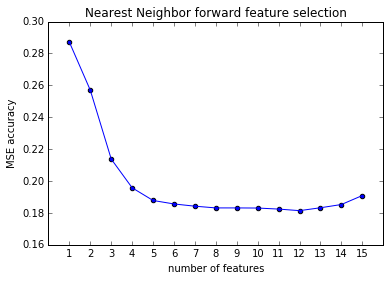

In [37]:
import matplotlib.pyplot as plt
plt.plot(X,pred.values())
plt.scatter(X,pred.values())
plt.xticks(X)
plt.xlabel("number of features")
plt.ylabel("MSE accuracy")
plt.title("Nearest Neighbor forward feature selection")
plt.show()

In [38]:
pred.values()

[0.2871177420905488,
 0.25697665982996526,
 0.21378624116864187,
 0.19575152286306835,
 0.18779908194319717,
 0.18561600593988395,
 0.18421756379572052,
 0.18313586560856884,
 0.18313260966194408,
 0.18305676862145451,
 0.18240330246922701,
 0.1814225093232554,
 0.18323725235880048,
 0.18527050375389001,
 0.19090516015169812]